<a href="https://colab.research.google.com/github/Ayllinice/Filin_AI_Labs/blob/main/Lab2AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа № 2

ФИО: Филин Илья Александрович

Группа: БИВТ-22-СП-4

###1. Название датасета: Sleep_health_and_lifestyle_dataset

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


###2.Описать кратко постановку задачи, что от вас хотят. Какие есть переменные.

In [3]:
data = df
# Определяем целевую переменную
target_column = "Stress Level"

# Анализ переменных
for column in data.columns:
    col_type = data[column].dtype
    description = ""

    # Определяем описание в зависимости от типа данных
    if col_type == 'object':
        unique_values = data[column].nunique()
        description = f"Категориальные данные. Уникальные значения: {unique_values}."
    elif np.issubdtype(col_type, np.number):
        min_val = data[column].min()
        max_val = data[column].max()
        unique_values = data[column].nunique()
        description = f"Числовые данные. Диапазон значений: {min_val}–{max_val}. Уникальных значений: {unique_values}"
        if column == target_column:
            target_type = "дискретное" if unique_values < 20 else "непрерывное"
            description += f". Это целевая переменная ({target_type})."
    elif np.issubdtype(col_type, np.datetime64):
        description = f"Данные типа времени. Диапазон: от {data[column].min()} до {data[column].max()}."
    else:
        description = "Неизвестный тип данных."

    # Выводим информацию по колонке
    print(f"Колонка: {column}")
    print(f"Тип данных: {col_type}")
    print(f"Описание: {description}\n")


Колонка: Person ID
Тип данных: int64
Описание: Числовые данные. Диапазон значений: 1–374. Уникальных значений: 374

Колонка: Gender
Тип данных: object
Описание: Категориальные данные. Уникальные значения: 2.

Колонка: Age
Тип данных: int64
Описание: Числовые данные. Диапазон значений: 27–59. Уникальных значений: 31

Колонка: Occupation
Тип данных: object
Описание: Категориальные данные. Уникальные значения: 11.

Колонка: Sleep Duration
Тип данных: float64
Описание: Числовые данные. Диапазон значений: 5.8–8.5. Уникальных значений: 27

Колонка: Quality of Sleep
Тип данных: int64
Описание: Числовые данные. Диапазон значений: 4–9. Уникальных значений: 6

Колонка: Physical Activity Level
Тип данных: int64
Описание: Числовые данные. Диапазон значений: 30–90. Уникальных значений: 16

Колонка: Stress Level
Тип данных: int64
Описание: Числовые данные. Диапазон значений: 3–8. Уникальных значений: 6. Это целевая переменная (дискретное).

Колонка: BMI Category
Тип данных: object
Описание: Категори

####Создать модель для предсказания уровня стресса человека (Stress Level) на основе данных о сне, здоровье и образе жизни.

#### Типы переменных:

1. Независимые переменные (features):
   * Demographics:
     - Age: возраст участника.
     - Gender: пол участника.
     - Occupation: тип занятости.
   * Health and Lifestyle:
     - Physical Activity Level: уровень физической активности.
     - Smoking Habit: наличие привычки к курению (да/нет).
     - Alcohol Consumption per Week: частота употребления алкоголя (в неделю).
     - Sleep Duration: среднее количество часов сна в сутки.
     - Caffeine Consumption per Day: количество потребляемого кофеина (в день).
   * Sleep Quality:
     - Sleep Efficiency: эффективность сна в процентах.
     - Bedtime: среднее время отхода ко сну.
     - Wake-up Time: среднее время пробуждения.
     - REM Sleep Percentage: процент REM-фазы во сне.
     - Deep Sleep Percentage: процент глубокого сна.
   * Mental Health Indicators:
     - Daily Screen Time: среднее количество часов за экранами.
     - Daily Relaxation Time: среднее время, отведенное на расслабление (медитация, отдых).
     - Work Stress Level: уровень стресса на работе (самооценка участника).

2. Зависимая переменная (target):
   * Stress Level: уровень стресса участника, измеренный по шкале (например, от 0 до 100).

#### Целевое событие:
Предсказание уровня стресса как непрерывной числовой переменной.

In [ ]:
# Список переменных и их характеристики
variables_info = pd.DataFrame({
    "Тип данных": df.dtypes.values,
    "Переменная": df.columns,
    "Количество уникальных значений": [df[col].nunique() for col in df.columns],
})

# Вывод информации о переменных
print(variables_info)


   Тип данных               Переменная  Количество уникальных значений
0       int64                Person ID                             374
1      object                   Gender                               2
2       int64                      Age                              31
3      object               Occupation                              11
4     float64           Sleep Duration                              27
5       int64         Quality of Sleep                               6
6       int64  Physical Activity Level                              16
7       int64             Stress Level                               6
8      object             BMI Category                               4
9      object           Blood Pressure                              25
10      int64               Heart Rate                              19
11      int64              Daily Steps                              20
12     object           Sleep Disorder                               2


###3. Построение промежуточной гистограммы, расчет кол-ва уникальных значений

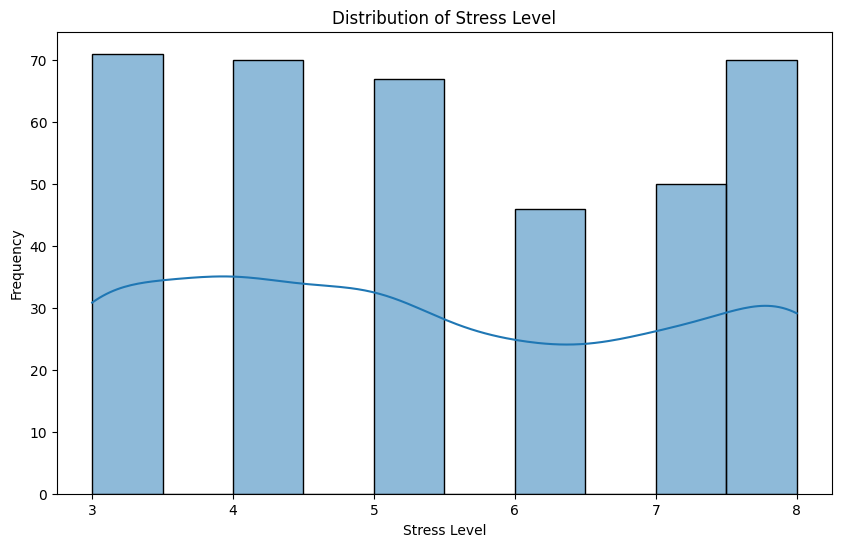

6

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming 'Stress Level' is your target variable. Replace with the actual column name if different.
plt.figure(figsize=(10, 6))
sns.histplot(df['Stress Level'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

print()
unique_stress_levels = df['Stress Level'].nunique()
unique_stress_levels


Количество уникальных значений переменной для нашего Y равно 6, соответственно стресс измеряется в дискретных категориях

###4. Вывести основные статистики

In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


###5. Основная информация по датасету

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


###6. Количество пропусков (NaN, Null, null, None) элементов во всех колонках

In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


###7. Гистограммы 5 признаков (из множества X)

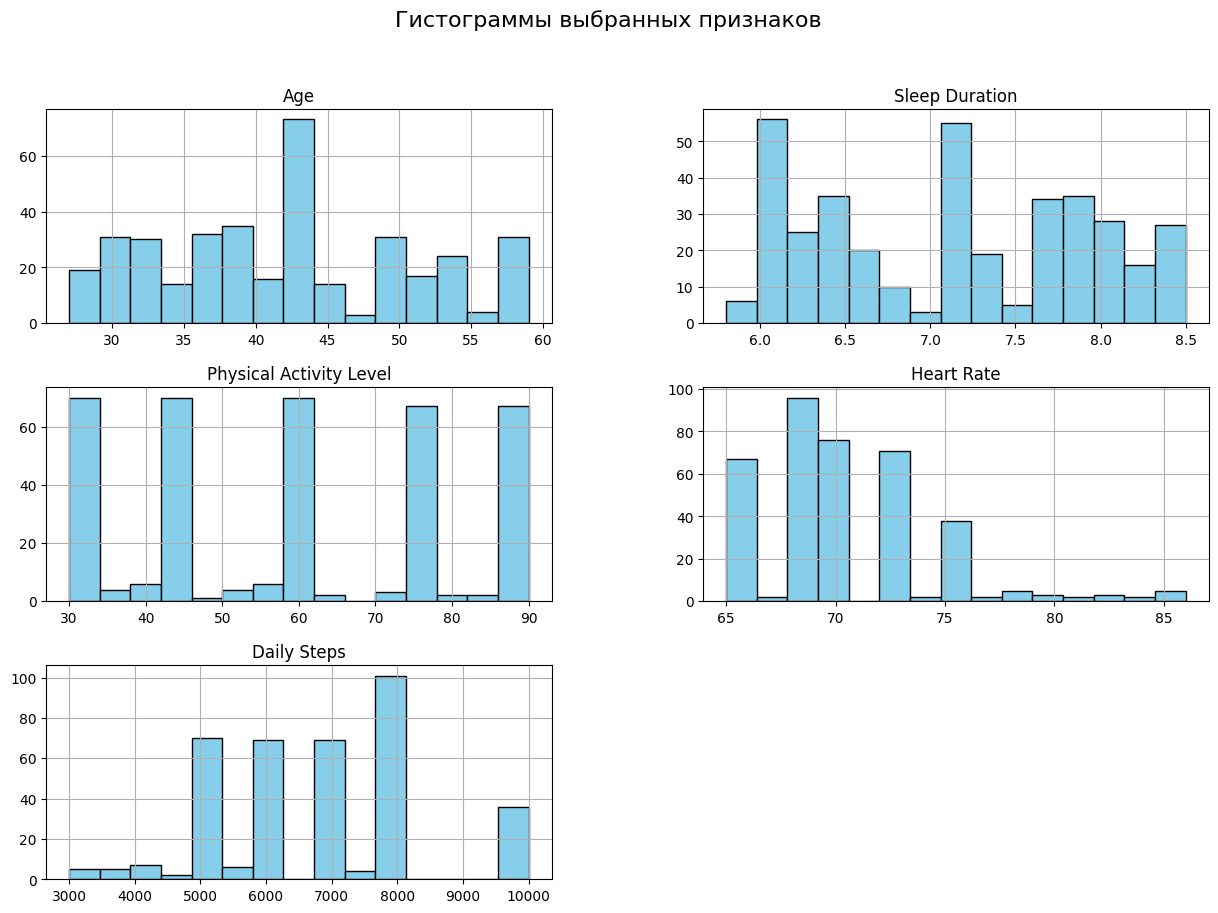

In [ ]:
columns_to_plot = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Heart Rate', 'Daily Steps']
df[columns_to_plot].hist(figsize=(15, 10), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Гистограммы выбранных признаков', fontsize=16)
plt.show()

###8. Графики зависимости 5

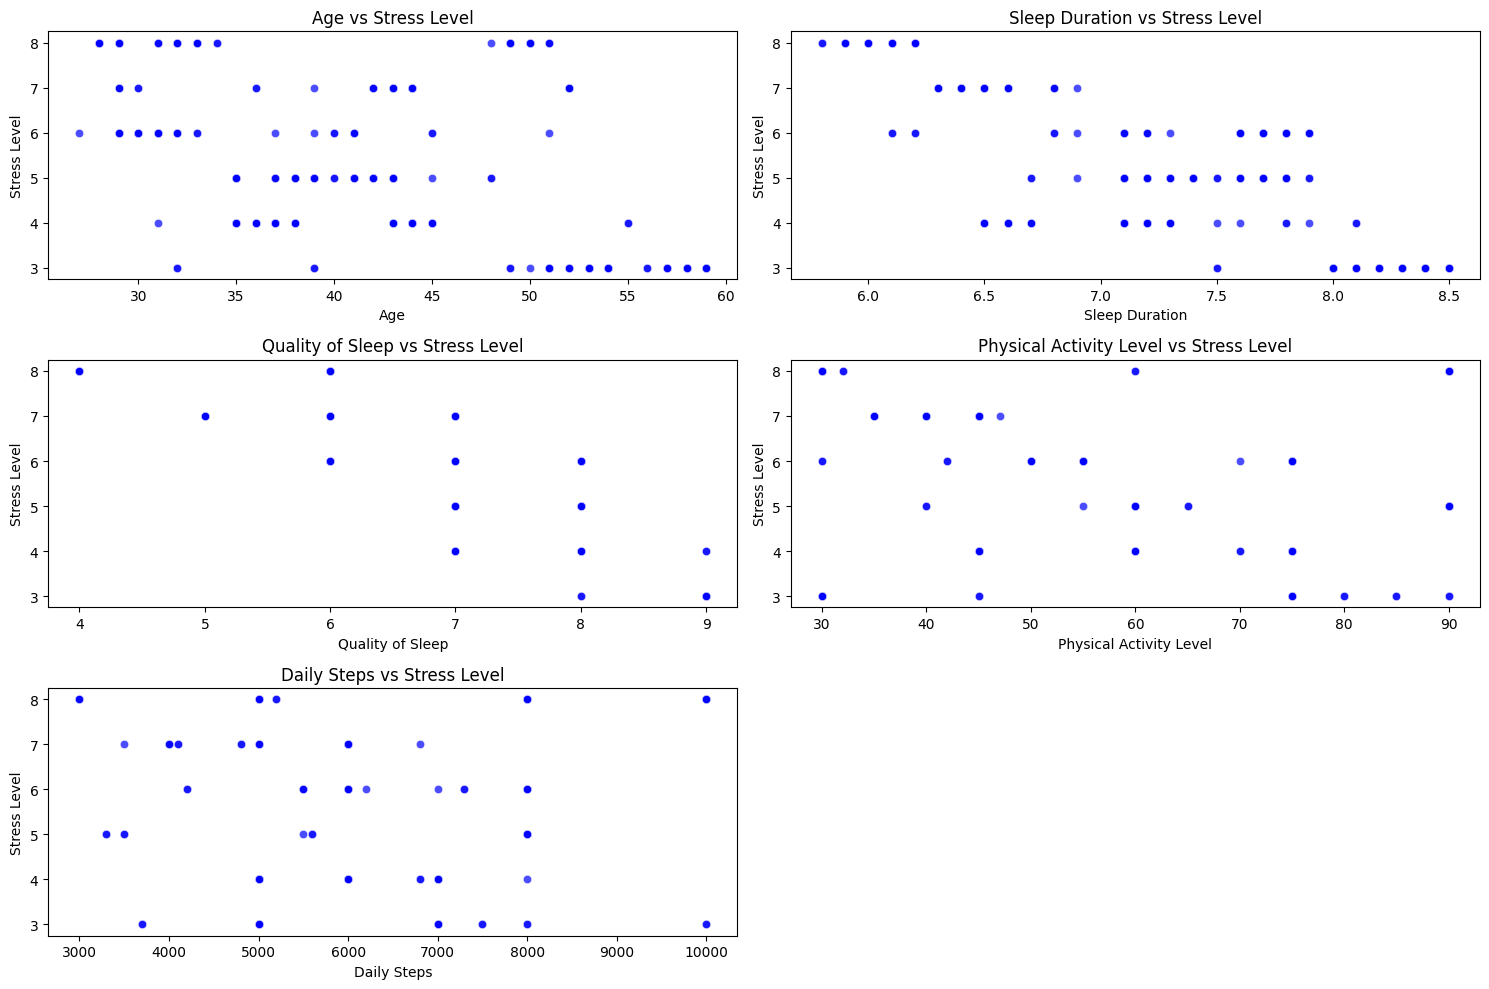

In [ ]:
# Загрузка данных
data = df

# Выбранные переменные
features = [
    "Age",
    "Sleep Duration",
    "Quality of Sleep",
    "Physical Activity Level",
    "Daily Steps"
]

# Целевая переменная
target = "Stress Level"

# Построение графиков
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    if feature in data.columns:
        plt.subplot(3, 2, i + 1)  # Создаем подграфик (3 строки, 2 столбца)
        sns.scatterplot(x=data[feature], y=data[target], alpha=0.7, color="blue")
        plt.title(f"{feature} vs {target}")
        plt.xlabel(feature)
        plt.ylabel(target)


plt.tight_layout()  # Оптимизация размещения графиков
plt.show()
